In [5]:
%pylab inline

import mlpy
import mlpy.wavelet as wave
import numpy as np
import matplotlib.pyplot as plt
import math

from IPython.html import widgets
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


####Load data

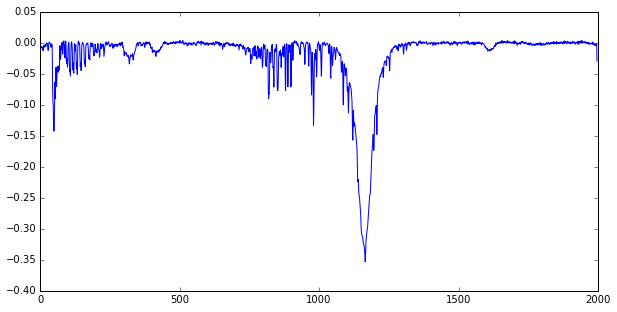

In [7]:
filename = 'qd080025.asc'

#s = np.fromfile('teldata', sep='\n')
s = np.genfromtxt(filename, delimiter='  ')
s = s[:,1]
s-=1.0
#s -= s.mean()
plt.figure(figsize=(10,5))
plt.plot(s)

####CWT

In [2]:
##X, scales = wave.cwt(s, dt=1, dj=0.1)
scales = wave.autoscales(N=s.shape[0], dt=1, dj=0.25, wf='dog',p=2)
X = wave.cwt(x=s,dt=1,scales=scales, wf='dog', p=2)
#print X.shape
plt.figure(figsize=(105,200))
plt.imshow(np.abs(X))

NameError: name 'wave' is not defined

####Remove frequencies, reconstruction
freq - number of highest frequencies removed

In [9]:
def reconstruct(freq):
    
    Xz = np.concatenate((np.zeros((freq,1997)), X[freq:]))
    #scales = wave.autoscales(N=Xz.shape[0], dt=1, dj=0.25, wf='dog',p=2)
    
    rec = wave.icwt(Xz, dt=1, scales=scales, wf='dog', p=2 )
    plt.figure(figsize=(15,5))
    plt.plot(rec)
    plt.plot(s, alpha=0.9)

slider = widgets.IntSlider(min=1, max=50, step=1, value=5)
w = widgets.interactive(reconstruct, freq=slider)
display(w)

NameError: global name 'X' is not defined

In [10]:
plot:: mpl_examples/pylab_examples/image_demo.py



SyntaxError: invalid syntax (<ipython-input-10-fdbfc327e90a>, line 1)

??